# Data-X Spring 2019: Homework 05

### Linear regression & Logistic regression



## Name:

Anish Saha

## SID: 

26071616


In this homework, you will do some exercises on prediction using sklearn. 

REMEMBER TO DISPLAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__ 
(Link in the Assignment details page on Bcourses) 

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Q1.1
Read the data file from the csv.

Print the count of NaN values for each attribute in the dataset.

Print the Range (min, max) and percentiles (25th, 50th, and 75th) of each attribute in the dataset

In [2]:
df = pd.read_csv('Energy.csv')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


 __REGRESSION__:

Using the data, we want to predict "Heating load". The output variable is continuous. Hence, we need to use a regression algorithm.  

__Q 1.2:__ 

Split the dataset randomly into train and test. Train a **Linear Regression** model on 80% of the data (80-20 split).
What is the intercept and coefficient values?



In [3]:
from sklearn import linear_model

np.random.seed(999)

idx = np.random.rand(len(df)) < 0.8
train, test = df[idx], df[~idx]
X_train, X_test = train.drop("Y1", axis=1), test.drop("Y1", axis=1)
y_train, y_test = train["Y1"], test["Y1"]

mod1 = linear_model.LinearRegression()
mod1.fit(X_train, y_train)
print("Intercept: " + str(mod1.intercept_))
print("Coefficients: " + str(mod1.coef_))

Intercept: 77.18090177133655
Coefficients: [-6.06972101e+01 -8.43455980e+11  8.43455980e+11  1.68691196e+12
  4.44633751e+00 -9.38715046e-02  2.04619723e+01  2.24009596e-01]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)



#### Q.1.3: 

Create a function which takes arrays of prediction and actual values of the output as parameters to calculate **'Root Mean Square error'** (RMSE) metric:  

1. Use the function to calculate the training RMSE  
2. Use the function to calculate the test RMSE



In [4]:
from sklearn.metrics import mean_squared_error

y_pred_train = mod1.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Training RMSE: " + str(train_rmse))

y_pred_test = mod1.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE: " + str(test_rmse))

Training RMSE: 2.86703272667715
Test RMSE: 3.231721035308233



#### Q1.4: 

Let's see the effect of amount of data on the performance of prediction model. Use varying amounts of data (100,200,300,400,500,all) from the training data you used previously to train different regression models. Report  training error and test error in each case. Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the test error should be plotted. Comment on the relationship you observe between the amount of data used to train the model and the test accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

Size of Training Data: 100
Training RMSE: 2.6361265923502972
Test RMSE: 9.315042731052332


Size of Training Data: 200
Training RMSE: 2.621991015495057
Test RMSE: 9.825236973945165


Size of Training Data: 300
Training RMSE: 2.6657434978225845
Test RMSE: 7.161778779514564


Size of Training Data: 400
Training RMSE: 2.8752517019693817
Test RMSE: 3.814014906549762


Size of Training Data: 500
Training RMSE: 2.963495153233195
Test RMSE: 3.098713834811911


Size of Training Data: 767
Training RMSE: 2.9285601420571594
Test RMSE: 2.54958930899609




Text(0.5,1,'Plot of Performance of Linear Regression Prediction Model vs. Size of Training Data \n')

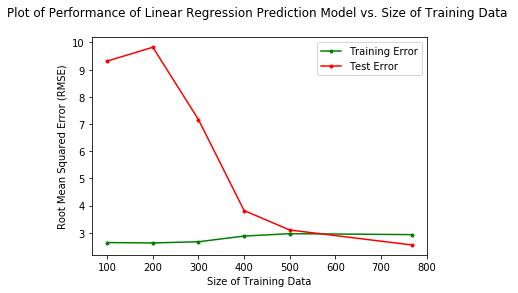

In [5]:
train_err, test_err = [], []
train_len = [100, 200, 300, 400, 500, int(len(df)-1)]

for i in train_len:
    print("Size of Training Data: " + str(i))
    train, test = df[:i], df[i:]
    X_train, X_test = train.drop("Y1", axis=1), test.drop("Y1", axis=1)
    y_train, y_test = train["Y1"], test["Y1"]
    mod = linear_model.LinearRegression()
    mod.fit(X_train, y_train)
    
    y_pred_train = mod.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    print("Training RMSE: " + str(train_rmse))
    y_pred_test = mod.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    print("Test RMSE: " + str(test_rmse))
    train_err.append(train_rmse)
    test_err.append(test_rmse)
    print("\n")
    
plt.plot(train_len, train_err, c='g', marker=".")
plt.plot(train_len, test_err, c='r', marker=".")
plt.legend(["Training Error", "Test Error"])
plt.xlabel("Size of Training Data")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Plot of Performance of Linear Regression Prediction Model vs. Size of Training Data \n")

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined discrete classes. On inputting a feature vector into the model, the trained model is able to predict a class of that instance.


#### Q2.1
Bucket the values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

**HINT:** Use pandas.cut

This converts the given dataset  into a classification problem. Use this dataset with transformed 'heating load' to create a **logistic regression** classifiction model that predicts heating load type of a building. Split the data randomly into training and test set. Train the model on 80% of the data (80-20 split).


In [6]:
np.random.seed(333)

df["Y1"] = pd.cut(df["Y1"], bins=[0, 14, 28, np.inf], labels=['Low','Medium','High'])
idx = np.random.rand(len(df)) < 0.8
train, test = df[idx], df[~idx]
X_train, X_test = train.drop("Y1", axis=1), test.drop("Y1", axis=1)
y_train, y_test = train["Y1"], test["Y1"]

mod2 = linear_model.LogisticRegression()
mod2.fit(X_train, y_train)
print("Intercept: " + str(mod2.intercept_))
print("Coefficients: " + str(mod2.coef_))

Intercept: [-0.94819598 -0.06907307 -0.42706064]
Coefficients: [[-1.80516165e+00 -1.49584151e-02  3.15221006e-02 -2.32402579e-02
   5.55021886e-01 -1.02228080e-01  5.16507156e+00  2.11728770e-01]
 [-1.16819523e-01  1.38213679e-02 -3.43761046e-02  2.40987363e-02
  -9.18816402e-01  2.12554847e-02 -6.30459170e+00  1.44453537e-02]
 [-1.97810161e-01  8.68535789e-04  2.51658727e-04  3.08438531e-04
  -1.30192761e-01  2.52686721e-03  9.84267917e-01 -1.22539882e-01]]


#### Q2.2 
- Print the training and test accuracies
- Print the confusion matrix
- Print the precision and recall numbers for all the classes


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

y_pred_train = mod2.predict(X_train)
train_rmse = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: " + str(train_rmse))

y_pred_test = mod2.predict(X_test)
test_rmse = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: " + str(test_rmse))

print("\n\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred_test))

print("\n")
arr = precision_recall_fscore_support(y_test, y_pred_test)
print("Precision for 'Low' Class: " + str(arr[0][0]))
print("Recall for 'Low' Class: " + str(arr[0][1]))
print("Precision for 'Medium' Class: " + str(arr[1][0]))
print("Recall for 'Medium' Class: " + str(arr[1][1]))
print("Precision for 'High' Class: " + str(arr[2][0]))
print("Recall for 'High' Class: " + str(arr[2][1]))

Training Accuracy: 0.7974068071312804
Test Accuracy: 0.7947019867549668


Confusion Matrix: 
[[59  0  3]
 [ 0 34  2]
 [15 11 27]]


Precision for 'Low' Class: 0.7972972972972973
Recall for 'Low' Class: 0.7555555555555555
Precision for 'Medium' Class: 0.9516129032258065
Recall for 'Medium' Class: 0.9444444444444444
Precision for 'High' Class: 0.8676470588235293
Recall for 'High' Class: 0.8395061728395062


#### Q2.3
##### K Fold Cross Validation

 In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy of the k iterations
 
__Use 7-fold cross validation on the training data. Print the average accuracy__

In [8]:
from sklearn.model_selection import KFold

df = pd.read_csv('Energy.csv')
df["Y1"] = pd.cut(df["Y1"], bins=[0, 14, 28, np.inf], labels=['Low','Medium','High'])
X = df.drop("Y1", axis=1)
y = df["Y1"]

kf = KFold(n_splits=7)
train_err, test_err = [], []

print("Running 7-Fold Cross Validation...\n")
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    mod = linear_model.LogisticRegression()
    mod.fit(X_train, y_train)
    
    y_pred_train = mod2.predict(X_train)
    train_rmse = accuracy_score(y_train, y_pred_train)
    print("Training Accuracy: " + str(train_rmse))
    y_pred_test = mod2.predict(X_test)
    test_rmse = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy: " + str(test_rmse))
    train_err.append(train_rmse)
    test_err.append(test_rmse)
    
print("\nTraining Set Cross-Validation Accuracy: " + str(np.mean(train_err)))
print("\nTest Set Cross-Validation Accuracy: " + str(np.mean(test_err)))

Running 7-Fold Cross Validation...

Training Accuracy: 0.817629179331307
Test Accuracy: 0.6727272727272727
Training Accuracy: 0.8145896656534954
Test Accuracy: 0.6909090909090909
Training Accuracy: 0.7993920972644377
Test Accuracy: 0.7818181818181819
Training Accuracy: 0.7796352583586627
Test Accuracy: 0.9
Training Accuracy: 0.7857142857142857
Test Accuracy: 0.8636363636363636
Training Accuracy: 0.7936267071320182
Test Accuracy: 0.8165137614678899
Training Accuracy: 0.787556904400607
Test Accuracy: 0.8532110091743119

Training Set Cross-Validation Accuracy: 0.7968777282649734

Test Set Cross-Validation Accuracy: 0.7969736685333016


__Q2.4__

One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance functions as a part of classification. If we Scale features in the range [0,1] it is called unity based normalization.

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Energy.csv')
df["Y1"] = pd.cut(df["Y1"], bins=[0, 14, 28, np.inf], labels=['Low','Medium','High'])
X_ = df.drop("Y1", axis=1)
y = df["Y1"]

print("Performing Unity-Based Normalization...\n")
X = MinMaxScaler().fit_transform(X)

kf = KFold(n_splits=7)
train_err, test_err = [], []

print("Running 7-Fold Cross Validation...\n")
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mod = linear_model.LogisticRegression()
    mod.fit(X_train, y_train)
    
    y_pred_train = mod.predict(X_train)
    train_rmse = accuracy_score(y_train, y_pred_train)
    print("Training Accuracy: " + str(train_rmse))
    y_pred_test = mod.predict(X_test)
    test_rmse = accuracy_score(y_test, y_pred_test)
    print("Test Accuracy: " + str(test_rmse))
    train_err.append(train_rmse)
    test_err.append(test_rmse)
    
print("\nTraining Set Cross-Validation Accuracy: " + str(np.mean(train_err)))
print("\nTest Set Cross-Validation Accuracy: " + str(np.mean(test_err)))

Performing Unity-Based Normalization...

Running 7-Fold Cross Validation...

Training Accuracy: 0.8480243161094225
Test Accuracy: 0.5727272727272728
Training Accuracy: 0.8297872340425532
Test Accuracy: 0.6909090909090909
Training Accuracy: 0.8161094224924013
Test Accuracy: 0.7090909090909091
Training Accuracy: 0.8161094224924013
Test Accuracy: 0.8545454545454545
Training Accuracy: 0.8069908814589666
Test Accuracy: 0.8727272727272727
Training Accuracy: 0.7814871016691958
Test Accuracy: 0.7431192660550459
Training Accuracy: 0.7936267071320182
Test Accuracy: 0.7889908256880734

Training Set Cross-Validation Accuracy: 0.8131621550567084

Test Set Cross-Validation Accuracy: 0.7474442988204456
